## Kelompok 3
* Dhanada Santika Putri (22/497239/PA/21407)
* Yessica Thipandona (22/497660/PA/21441)
* Febriana Nur Syifa Rizqi (22/499532/PA/21541)

# Install necessary packages

In [ ]:
pip install ucimlrepo sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/6

# Data Exploration

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Mengambil dataset Student Performance yang tersedia di UCI Machine Learning Repository. Isinya mencakup data nilai ujian, serta faktor lain seperti kehadiran, dukungan keluarga, dll.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [ ]:
import pandas as pd

df = student_performance.data.original
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.to_csv('student_performance.csv', index=False)

In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


Mengambil sampel acak dari dataset untuk memahami variasi data.

In [ ]:
df.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
632,MS,F,19,R,GT3,T,1,1,at_home,other,...,4,3,3,1,1,3,4,7,8,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Mengecek duplikasi dalam dataset, dan didapatkan 0.

In [ ]:
# Count duplicate rows
df.duplicated().sum()

0

Nilai rata-rata, median, standar deviasi, nilai minimum & maksimum.

In [ ]:
#Summary statistics
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Mengecek missing value dalam dataset, dan ternyata didapatkan pula 0.

In [ ]:
# Count missing values
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


##Numerical Data Distributions

Histogram ini untuk melihat distribusi nilai numerik dalam dataset. Di antaranya didapatkan:


*   (studytime) Mayoritas siswa belajar di level 2 (sekitar 2-5 jam/minggu).
* (failures) Sebagian besar siswa tidak memiliki kegagalan akademik (nilai 0), tetapi ada yang memiliki 1-3 kegagalan.
* (absences) Sebagian besar siswa memiliki ketidakhadiran rendah, tetapi ada beberapa outlier dengan jumlah ketidakhadiran yang tinggi.
* (G1, G2) Nilai G1 dan G2 menunjukkan pola distribusi normal.




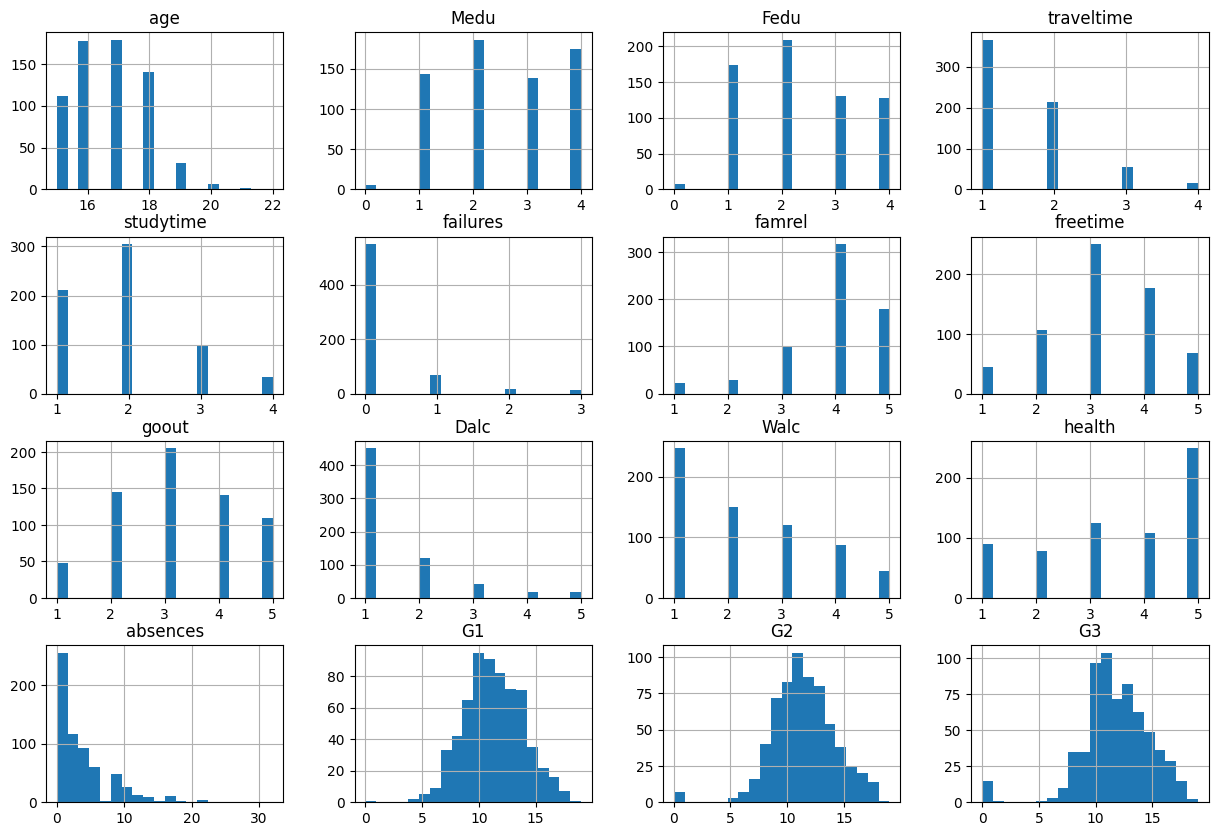

In [ ]:
df.hist(figsize=(15, 10), bins=20)
plt.show()

##Categorical Data Exploration

Untuk menampilkan setiap kategori dalam fitur biner, sehingga kita bisa melihat apakah ada ketidakseimbangan data di variabel kategorikal.

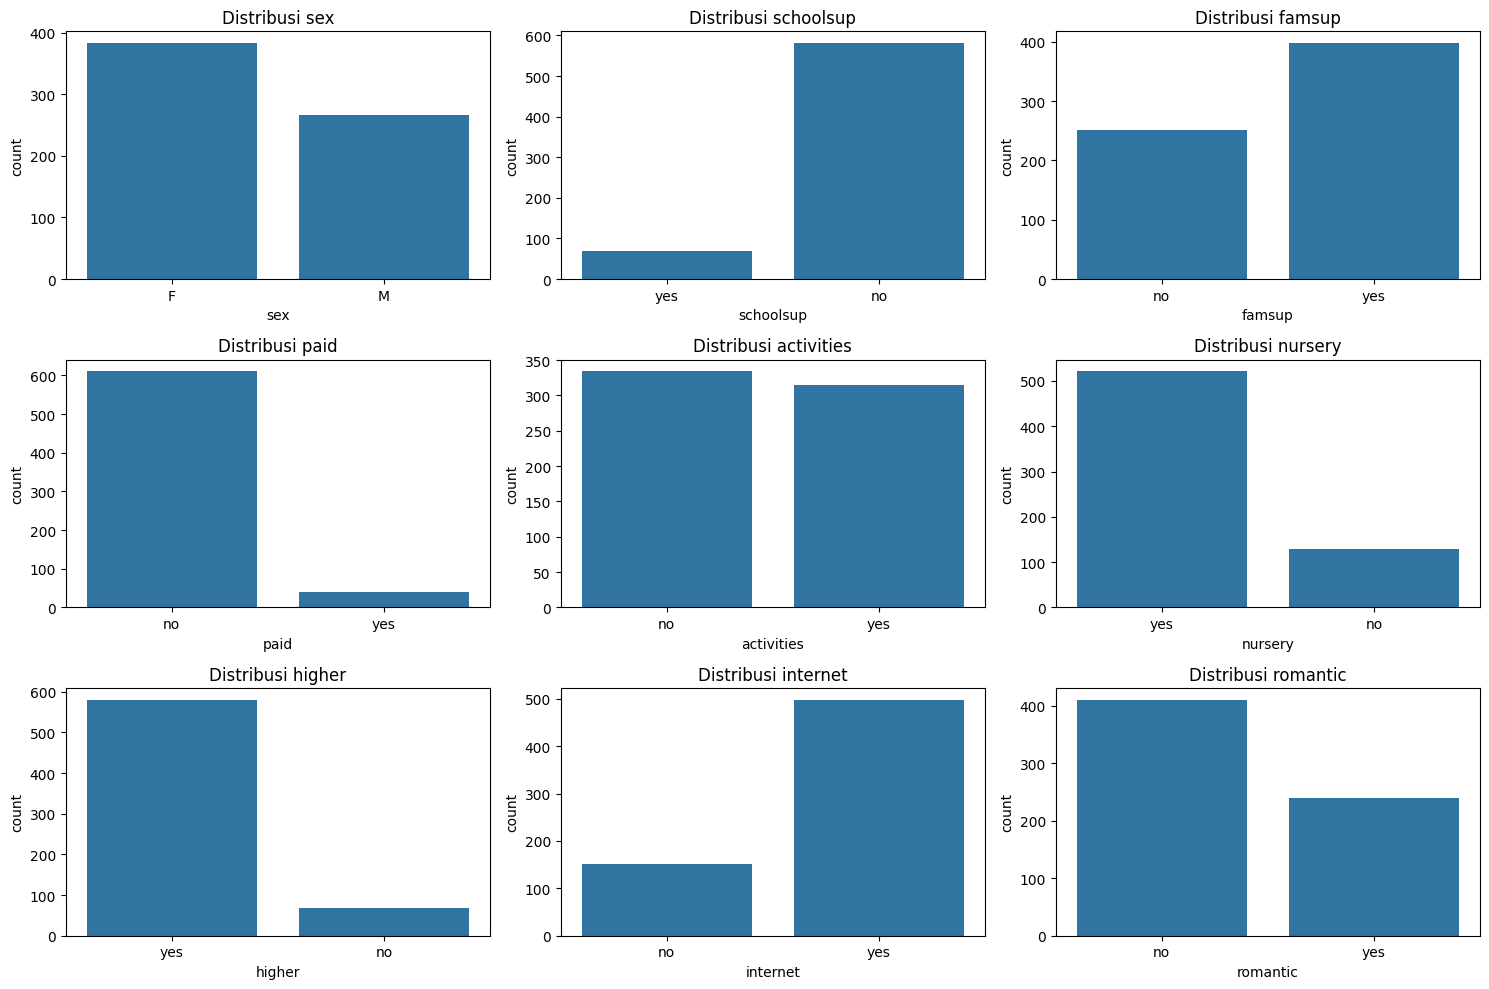

In [ ]:
categorical_vars = ["sex", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for idx, cat_col in enumerate(categorical_vars):
    ax = axes[idx // 3, idx % 3]
    sns.countplot(x=df[cat_col], ax=ax)
    ax.set_title(f'Distribusi {cat_col}')

plt.tight_layout()
plt.show()

## Discretazation

Data kontinu (angka) menjadi diskrit
* 0 - 4 → Very Low
* 4 - 8 → Low
* 8 - 12 → Medium
* 12 - 16 → High
* 16 - 20 → Very High

In [ ]:
# Pastikan kolom G1, G2, dan G3 ada
if all(col in df.columns for col in ["G1", "G2", "G3"]):
    bins = [0, 4, 8, 12, 16, 20]  # Definisi bins
    labels = ["Very Low", "Low", "Medium", "High", "Very High"]  # Definisi kategori

    # Diskretisasi
    df["G1_cat"] = pd.cut(df["G1"], bins=bins, labels=labels, include_lowest=True)
    df["G2_cat"] = pd.cut(df["G2"], bins=bins, labels=labels, include_lowest=True)
    df["G3_cat"] = pd.cut(df["G3"], bins=bins, labels=labels, include_lowest=True)

    # Tampilkan hasil
    print(df[["G1", "G1_cat", "G2", "G2_cat", "G3", "G3_cat"]].head())
else:
    print("Kolom G1, G2, atau G3 tidak ditemukan di DataFrame!")

   G1    G1_cat  G2  G2_cat  G3  G3_cat
0   0  Very Low  11  Medium  11  Medium
1   9    Medium  11  Medium  11  Medium
2  12    Medium  13    High  12  Medium
3  14      High  14    High  14    High
4  11    Medium  13    High  13    High


Pola:
* Mayoritas G1 ada di Medium (333) dan High (200). Sangat sedikit di very low (3).
* Pola yang sama ada di G2 dan G3.

In [ ]:
print(df["G1_cat"].value_counts())
print(df["G2_cat"].value_counts())
print(df["G3_cat"].value_counts())

G1_cat
Medium       333
High         200
Low           89
Very High     24
Very Low       3
Name: count, dtype: int64
G2_cat
Medium       344
High         197
Low           66
Very High     35
Very Low       7
Name: count, dtype: int64
G3_cat
Medium       308
High         230
Low           49
Very High     46
Very Low      16
Name: count, dtype: int64


In [ ]:
# drop G1, G2, dan G3 after discretization
df.drop(columns=["G1", "G2", "G3"], inplace=True)

## Encoding

Data yang tidak bertipe numerik perlu melalui proses encoding sebelum dapat digunakan oleh model machine learning. Dalam dataset ini, terdapat 20 atribut yang perlu melalui proses encoding.

In [ ]:
print(df.dtypes)  # Check data types

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1_cat        category
G2_cat        category
G3_cat        category
dtype: object


Fitur yang bertipe biner (yes/no) maupun (male/female) akan diencoding menjadi numerik (1/0)

In [ ]:
# Encode binary features (0 for No, 1 for Yes)
binary_features = ["schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
df[binary_features] = df[binary_features].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Encode 'sex' (0 for Female, 1 for Male)
df["sex"] = df["sex"].map({"F": 0, "M": 1})

- Fitur yang bertipe kategorik akan diencoding dengan teknik one-hot encoding
- Fitur yang bertipe boolean akan diencoding menjadi numerik (0/1)

In [ ]:
# One-Hot Encoding for categorical features
categorical_features = ["school", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian"]
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Convert boolean values to integers (False → 0, True → 1)
df = df.astype({col: int for col in df.select_dtypes(include=['bool']).columns})

# Display the first few rows
print(df.head())

   sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     4     4           2          2         0          1       0   
1    0   17     1     1           1          2         0          0       1   
2    0   15     1     1           1          2         0          1       0   
3    0   15     4     2           1          3         0          0       1   
4    0   16     3     3           1          2         0          0       1   

   paid  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0     0  ...             0            0           0              0   
1     0  ...             0            0           1              0   
2     0  ...             0            0           1              0   
3     0  ...             0            0           0              1   
4     0  ...             0            0           1              0   

   Fjob_teacher  reason_home  reason_other  reason_reputation  \
0             1            0           

Setiap kategori ordinal (Very Low, Low, Medium, High, Very High) pada fitur G1, G2, dan G3 akan diencoding menjadi numerik dalam range 0-4

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Encode ordinal categories for G1_cat, G2_cat, G3_cat
ordinal_categories = [["Very Low", "Low", "Medium", "High", "Very High"]]
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories * 3)  # Apply the same mapping to all three columns
df[["G1_cat", "G2_cat", "G3_cat"]] = ordinal_encoder.fit_transform(df[["G1_cat", "G2_cat", "G3_cat"]]).astype(int)

df.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,4,4,2,2,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,17,1,1,1,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,15,1,1,1,2,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,0,15,4,2,1,3,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
4,0,16,3,3,1,2,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
print(df.dtypes)

sex                  int64
age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1_cat               int64
G2_cat               int64
G3_cat               int64
school_MS            int64
address_U            int64
famsize_LE3          int64
Pstatus_T            int64
Mjob_health          int64
Mjob_other           int64
Mjob_services        int64
Mjob_teacher         int64
Fjob_health          int64
Fjob_other           int64
Fjob_services        int64
Fjob_teacher         int64
r

## Check for Outliers

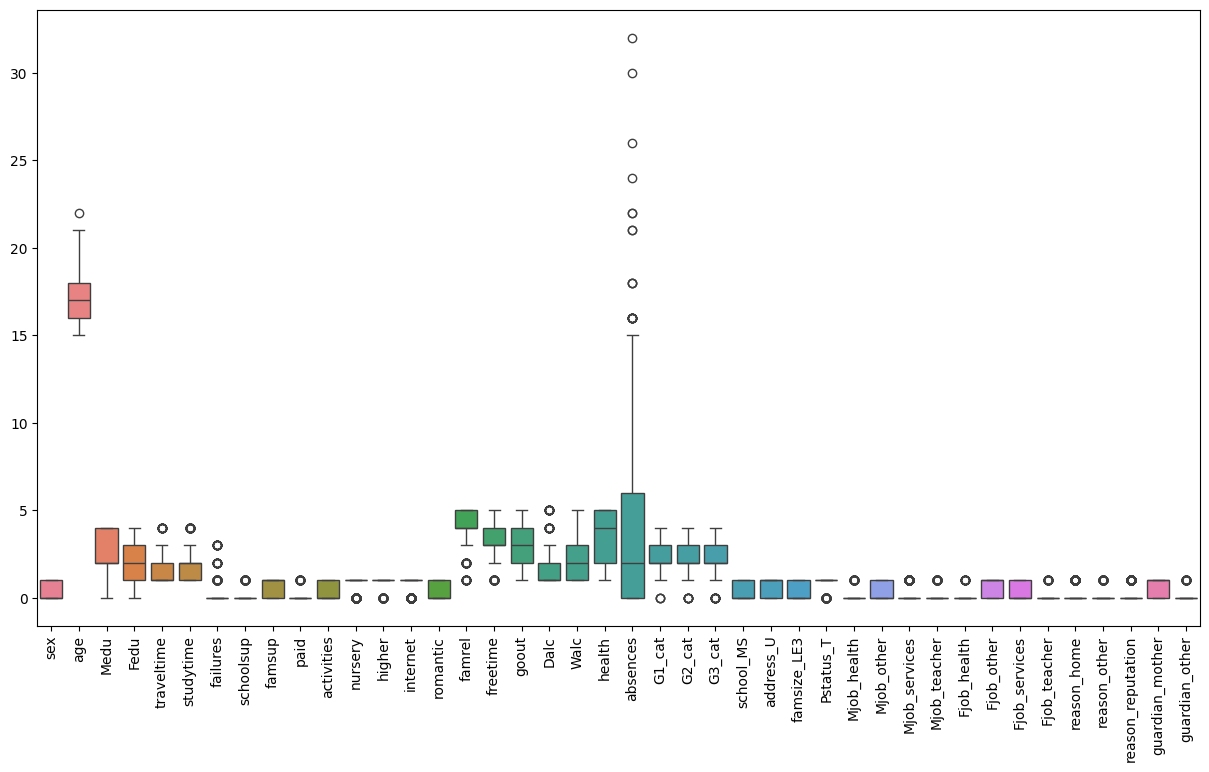

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Deteksi Outlier dengan IQR (Interquartile Range)

# Pastikan hanya kolom numerik yang digunakan
df_numeric = df.select_dtypes(include=['number'])

Q1 = df.quantile(0.25)  # Kuartil pertama
Q3 = df.quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1  # Rentang interkuartil

# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengetahui jumlah outlier per kolom
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Jumlah outlier per kolom:\n", outliers)


Jumlah outlier per kolom:
 sex                    0
age                    1
Medu                   0
Fedu                   0
traveltime            16
studytime             35
failures             100
schoolsup             68
famsup                 0
paid                  39
activities             0
nursery              128
higher                69
internet             151
romantic               0
famrel                51
freetime              45
goout                  0
Dalc                  34
Walc                   0
health                 0
absences              21
G1_cat                 3
G2_cat                 7
G3_cat                16
school_MS              0
address_U              0
famsize_LE3            0
Pstatus_T             80
Mjob_health           48
Mjob_other             0
Mjob_services        136
Mjob_teacher          72
Fjob_health           23
Fjob_other             0
Fjob_services          0
Fjob_teacher          36
reason_home          149
reason_other          7

- Terdapat 17 atribut data yang memiliki outlier.
- Atribut dengan jumlah outlier yang cukup signifikan diantaranya yaitu failures, higher, internet, Mjob_services, reason_home, dan reason_reputation.

## Correlation Analysis

<ipython-input-25-cf1f344fc69c>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_corr = correlation_matrix.applymap(lambda x: x if abs(x) >= threshold else np.nan)


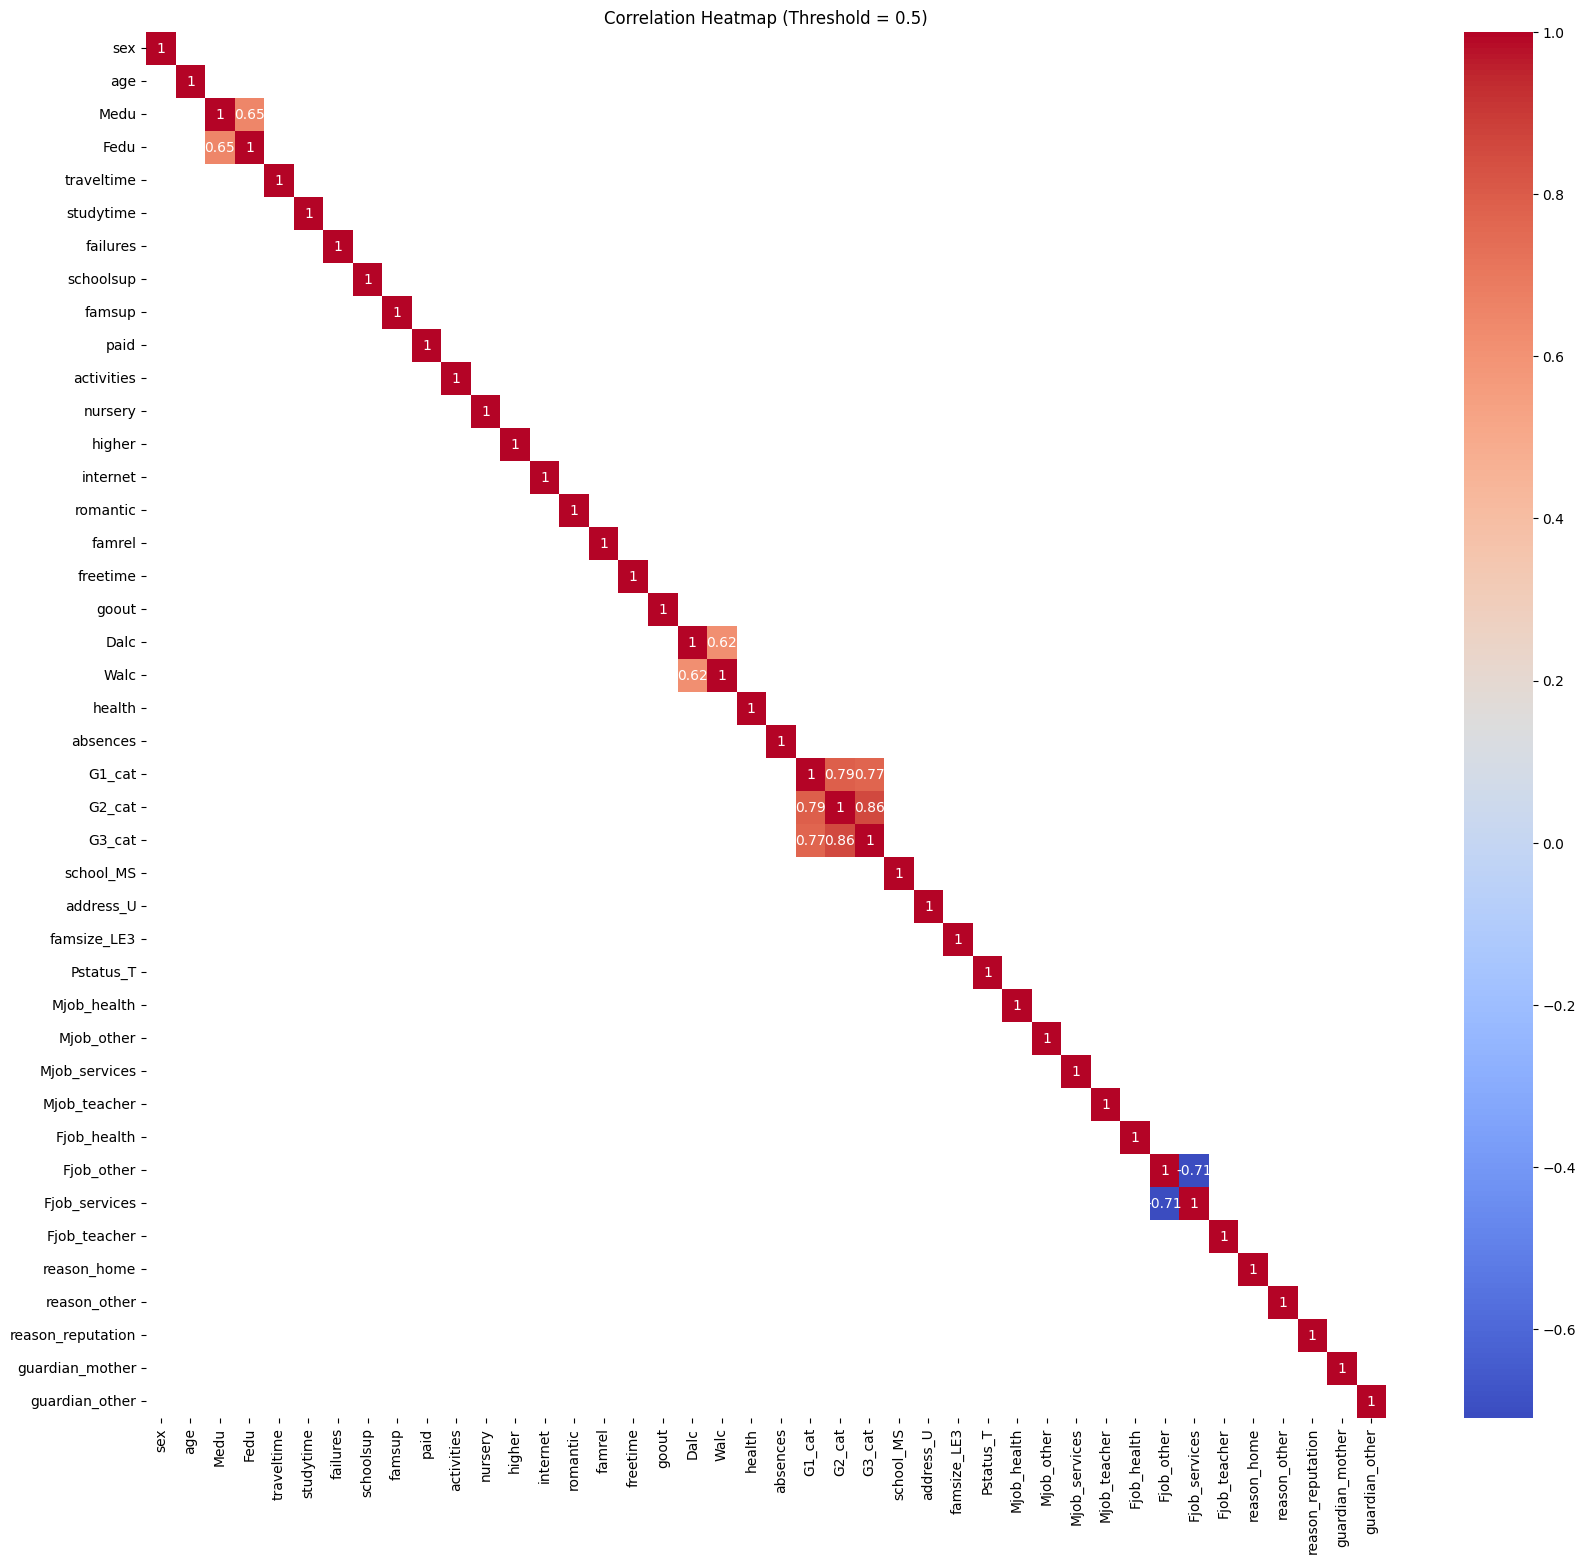

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Matriks korelasi
correlation_matrix = df.corr()

# Threshold
threshold = 0.5
filtered_corr = correlation_matrix.applymap(lambda x: x if abs(x) >= threshold else np.nan)

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", mask=filtered_corr.isnull())
plt.title("Correlation Heatmap (Threshold = 0.5)")
plt.show()

- Variabel target (G3_cat) memiliki korelasi yang tinggi dengan G1_cat dan G2_cat, yaitu sebesar 0.77 dan 0.86.
- Variabel lain yang memiliki korelasi tinggi:
 - Medu (pendidikan ibu) dan Fedu (pendidikan bapak) sebesar 0.65
 - Dalc (konsumsi alkohol di hari kerja) dan Walc (konsumsi alkohol di akhir pekan) sebesar 0.62
 - Fjob_services (pekerjaan bapak di bidang pelayanan) dan Fjob_other (pekerjaan bapak di bidang lain) sebesar 0.71

# Data Splitting

In [ ]:
y = df["G3_cat"]  # Target
X = df.drop(columns=["G3_cat"]) # Features

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Data Preprocessing

##Handling Outliers

In [ ]:
def replace_outliers_with_median(train_data, test_data, column):
    Q1 = train_data[column].quantile(0.25)
    Q3 = train_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = train_data[column].median()

    # Ganti outlier pada training set
    train_data[column] = np.where((train_data[column] < lower_bound) | (train_data[column] > upper_bound),
                                  median_value, train_data[column])

    # Ganti outlier pada test set dengan batasan dari training set
    test_data[column] = np.where((test_data[column] < lower_bound) | (test_data[column] > upper_bound),
                                 median_value, test_data[column])

    return train_data.astype(int), test_data.astype(int)

# Menerapkan preprocessing hanya pada training data
for col in X_train.select_dtypes(include=['number']).columns:
    X_train, X_test = replace_outliers_with_median(X_train, X_test, col)

##Dealing with Imbalanced Classes

In [ ]:
# Check for imbalance ratio
print(y_train.value_counts(normalize=True))

G3_cat
2    0.475771
3    0.354626
1    0.074890
4    0.070485
0    0.024229
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE

# Handling Imbalanced Classes with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Class distribution after SMOTE:
G3_cat
1    0.2
3    0.2
2    0.2
4    0.2
0    0.2
Name: proportion, dtype: float64


In [ ]:
X_train_resampled.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,2,1,1,2,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,16,1,1,1,2,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,16,3,4,1,2,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1,17,3,2,2,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,15,3,3,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


##Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Buat instance scaler untuk melakukan standardization
scaler = StandardScaler()

# Pilih fitur numerik dari dataset hasil SMOTE
numeric_features = X_train_resampled.select_dtypes(include=['number']).columns

# Tampilkan data sebelum scaling
print("Data training sebelum scaling (numerik):")
print(X_train_resampled[numeric_features].head())  # Data training sebelum scaling

print("\nData testing sebelum scaling (numerik):")
print(X_test[numeric_features].head())  # Data testing sebelum scaling

# Scaling data training: hitung mean dan std dev dari data training (hasil SMOTE), lalu transform
X_train_scaled = scaler.fit_transform(X_train_resampled[numeric_features])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features)

# Scaling data testing: gunakan mean dan std dev dari training untuk transformasi
X_test_scaled = scaler.transform(X_test[numeric_features])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features)

# Menyisipkan kembali data non-numerik (jika ada)
X_train_scaled = pd.concat([X_train_scaled, X_train_resampled.reset_index(drop=True).drop(columns=numeric_features)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test.reset_index(drop=True).drop(columns=numeric_features)], axis=1)

# Menampilkan hasil scaling
print("Data training setelah scaling:")
print(X_train_scaled.head())

print("\nData testing setelah scaling:")
print(X_test_scaled.head())

Data training sebelum scaling (numerik):
   sex  age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  \
0    0   18     2     1           1          2         0          0       1   
1    0   16     1     1           1          2         0          0       1   
2    0   16     3     4           1          2         0          0       1   
3    1   17     3     2           2          1         0          0       1   
4    0   15     3     3           2          1         0          0       1   

   paid  ...  Mjob_teacher  Fjob_health  Fjob_other  Fjob_services  \
0     0  ...             0            0           1              0   
1     0  ...             0            0           1              0   
2     0  ...             0            0           1              0   
3     0  ...             0            0           0              1   
4     0  ...             0            0           1              0   

   Fjob_teacher  reason_home  reason_other  reason_reputation  

#Modelling

Model dilatih dengan data yang telah melalui SMOTE

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define models
models = {
    "SVM": SVC(kernel="linear", probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42)
}

##Menerapkan Stratified Cross-Validation

In [ ]:
# Define Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_results = {}
for name, model in models.items():
    scores = cross_validate(model, X_train_scaled, y_train_resampled, cv=kf,
                            scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

    cv_results[name] = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision_macro': np.mean(scores['test_precision_macro']),
        'recall_macro': np.mean(scores['test_recall_macro']),
        'f1_macro': np.mean(scores['test_f1_macro'])
    }

    print(f"\n{name} - Cross-Validation Scores:")
    for metric, score in cv_results[name].items():
        print(f"{metric}: {score:.4f}")

best_model_name = max(cv_results, key=lambda x: np.mean(cv_results[x]['f1_macro']))
print(f"\nBest Model from Cross-validation: {best_model_name}")


SVM - Cross-Validation Scores:
accuracy: 0.8722
precision_macro: 0.8724
recall_macro: 0.8721
f1_macro: 0.8711

AdaBoost - Cross-Validation Scores:
accuracy: 0.7250
precision_macro: 0.7877
recall_macro: 0.7246
f1_macro: 0.7104

Logistic Regression - Cross-Validation Scores:
accuracy: 0.8741
precision_macro: 0.8729
recall_macro: 0.8741
f1_macro: 0.8725

Random Forest - Cross-Validation Scores:
accuracy: 0.9111
precision_macro: 0.9103
recall_macro: 0.9111
f1_macro: 0.9101

Best Model from Cross-validation: Random Forest


In [ ]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    # Print detailed per-class evaluation
    print(f"\n{name} - Classification Report (Per Class):")
    print(classification_report(y_test, y_pred))


SVM - Classification Report (Per Class):
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.60      0.60      0.60        15
           2       0.77      0.86      0.81        92
           3       0.80      0.71      0.75        69
           4       1.00      0.57      0.73        14

    accuracy                           0.76       195
   macro avg       0.70      0.67      0.66       195
weighted avg       0.78      0.76      0.76       195


AdaBoost - Classification Report (Per Class):
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.56      0.60      0.58        15
           2       0.80      0.79      0.80        92
           3       0.72      0.45      0.55        69
           4       0.31      0.79      0.44        14

    accuracy                           0.66       195
   macro avg       0.59      0.73      0.6

##Menerapkan Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report
import numpy as np

# Define base models
models = {
    "SVM": SVC(probability=True, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Define hyperparameter grids
param_grids = {
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
}

# Define Stratified K-Fold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Dictionary to store the best models
best_models = {}

for name, model in models.items():
    print(f"\nTuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=kf, scoring='f1_macro', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train_resampled)

    best_models[name] = grid_search.best_estimator_
    print(f"\n{name} - Best Parameters: {grid_search.best_params_}")


Tuning SVM...

SVM - Best Parameters: {'C': 1, 'kernel': 'rbf'}

Tuning AdaBoost...

AdaBoost - Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}

Tuning Logistic Regression...

Logistic Regression - Best Parameters: {'C': 1, 'solver': 'lbfgs'}

Tuning Random Forest...

Random Forest - Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Perform Stratified Cross-Validation on best models
cv_results = {}
for name, model in best_models.items():
    print(f"\nPerforming Stratified Cross-Validation for {name}...")
    scores = cross_validate(model, X_train_scaled, y_train_resampled, cv=kf,
                            scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'], n_jobs=-1)

    cv_results[name] = {
        'accuracy': np.mean(scores['test_accuracy']),
        'precision_macro': np.mean(scores['test_precision_macro']),
        'recall_macro': np.mean(scores['test_recall_macro']),
        'f1_macro': np.mean(scores['test_f1_macro'])
    }

    print(f"\n{name} - Cross-Validation Scores:")
    for metric, score in cv_results[name].items():
        print(f"{metric}: {score:.4f}")

best_model_name = max(cv_results, key=lambda x: cv_results[x]['f1_macro'])
print(f"\nBest Model from Cross-Validation: {best_model_name}")


Performing Stratified Cross-Validation for SVM...

SVM - Cross-Validation Scores:
accuracy: 0.8889
precision_macro: 0.8961
recall_macro: 0.8890
f1_macro: 0.8893

Performing Stratified Cross-Validation for AdaBoost...

AdaBoost - Cross-Validation Scores:
accuracy: 0.7889
precision_macro: 0.8249
recall_macro: 0.7896
f1_macro: 0.7862

Performing Stratified Cross-Validation for Logistic Regression...

Logistic Regression - Cross-Validation Scores:
accuracy: 0.8833
precision_macro: 0.8838
recall_macro: 0.8833
f1_macro: 0.8820

Performing Stratified Cross-Validation for Random Forest...

Random Forest - Cross-Validation Scores:
accuracy: 0.9296
precision_macro: 0.9332
recall_macro: 0.9298
f1_macro: 0.9289

Best Model from Cross-Validation: Random Forest


In [ ]:
# Evaluate best models on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} - Classification Report")
    print(classification_report(y_test, y_pred))


SVM - Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.13      0.20        15
           2       0.72      0.89      0.80        92
           3       0.77      0.77      0.77        69
           4       0.86      0.43      0.57        14

    accuracy                           0.73       195
   macro avg       0.55      0.44      0.47       195
weighted avg       0.70      0.73      0.70       195


AdaBoost - Classification Report
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.78      0.47      0.58        15
           2       0.81      0.85      0.83        92
           3       0.80      0.83      0.81        69
           4       1.00      0.71      0.83        14

    accuracy                           0.81       195
   macro avg       0.79      0.77      0.76       195
weighted avg  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
